# Accessibility Scan

This Jupyter notebook processes the necessary data file of `data_out/errors-different-counts-a11y-analyze-errors-summary.csv` generated from the various processing scripts in various phases of the pipeline. The result of this notebook when executed will result in the generation of `Figure 7` as described in the accompanying paper.

This file generates 2 figures;
 - 7(a) Heatmap respresents errors reported by aXe engine
 - 7(b) Heatmap respresents errors reported by HTMLCS engine
 

## Required Libraries:
- `matplotlib`
- `numpy`
- `pandas`
- `seaborn`

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn as sns

matplotlib.rcParams.update({'font.size': 20, 'pdf.fonttype': 42, 'ps.fonttype': 42})

In [2]:
different_errors = pandas.read_csv('data_out/errors-different-counts-a11y-analyze-errors-summary.csv')

In [3]:
error_grid = different_errors[different_errors['Type'] == 'error'].pivot(index='Theme', columns=['Runner', 'DetailCode'], values='count')

## Figure 7(a): Heatmap of Errors Types from aXe Engine

In [4]:
axe_errors = error_grid['axe']

In [5]:
axe_error_columns = axe_errors.columns

reassignment = {}

for i, column_name in enumerate(axe_error_columns):
    reassignment[column_name] = f'AXE-E{i+1}'

reassignment_df = pandas.DataFrame.from_dict(reassignment, orient="index")
reassignment_df.rename(columns={0: 'Error Code'}, inplace=True)
reassignment_df

,Error Code
color-contrast,AXE-E1
image-alt,AXE-E2
link-in-text-block,AXE-E3
link-name,AXE-E4
bypass,AXE-E5
audio-caption,AXE-E6
aria-hidden-focus,AXE-E7
aria-input-field-name,AXE-E8
aria-required-parent,AXE-E9
region,AXE-E10


In [6]:
axe_errors.rename(columns=reassignment, inplace=True)
axe_errors

/tmp/ipykernel_367207/1119864014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  axe_errors.rename(columns=reassignment, inplace=True)


DetailCode,AXE-E1,AXE-E2,AXE-E3,AXE-E4,AXE-E5,AXE-E6,AXE-E7,AXE-E8,AXE-E9,AXE-E10
Theme,,,,,,,,,,
darcula,14925118,297021,79246,4721,2277,633,77,47,38,5
dark,3420965,297021,79246,4720,2278,635,77,46,28,5
horizon,2561526,297021,79246,4722,2278,633,77,47,38,5
light,9779805,296992,1103,4719,2276,634,81,46,10,5
material-darker,5165510,297021,79246,4720,2279,635,77,47,28,5
solarized,7428277,297021,79557,4718,2276,633,77,47,28,5


In [7]:
for updated_column in axe_errors.columns.tolist():
    normalizer = axe_errors[updated_column].max()
    axe_errors[updated_column] = axe_errors[updated_column] / normalizer * 100.0
    
axe_errors

/tmp/ipykernel_367207/3874306261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  axe_errors[updated_column] = axe_errors[updated_column] / normalizer * 100.0


DetailCode,AXE-E1,AXE-E2,AXE-E3,AXE-E4,AXE-E5,AXE-E6,AXE-E7,AXE-E8,AXE-E9,AXE-E10
Theme,,,,,,,,,,
darcula,100.000000,100.000000,99.609085,99.978823,99.912242,99.685039,95.061728,100.00000,100.000000,100.0
dark,22.920857,100.000000,99.609085,99.957645,99.956121,100.000000,95.061728,97.87234,73.684211,100.0
horizon,17.162518,100.000000,99.609085,100.000000,99.956121,99.685039,95.061728,100.00000,100.000000,100.0
light,65.525814,99.990236,1.386427,99.936468,99.868363,99.842520,100.000000,97.87234,26.315789,100.0
material-darker,34.609509,100.000000,99.609085,99.957645,100.000000,100.000000,95.061728,100.00000,73.684211,100.0
solarized,49.770307,100.000000,100.000000,99.915290,99.868363,99.685039,95.061728,100.00000,73.684211,100.0


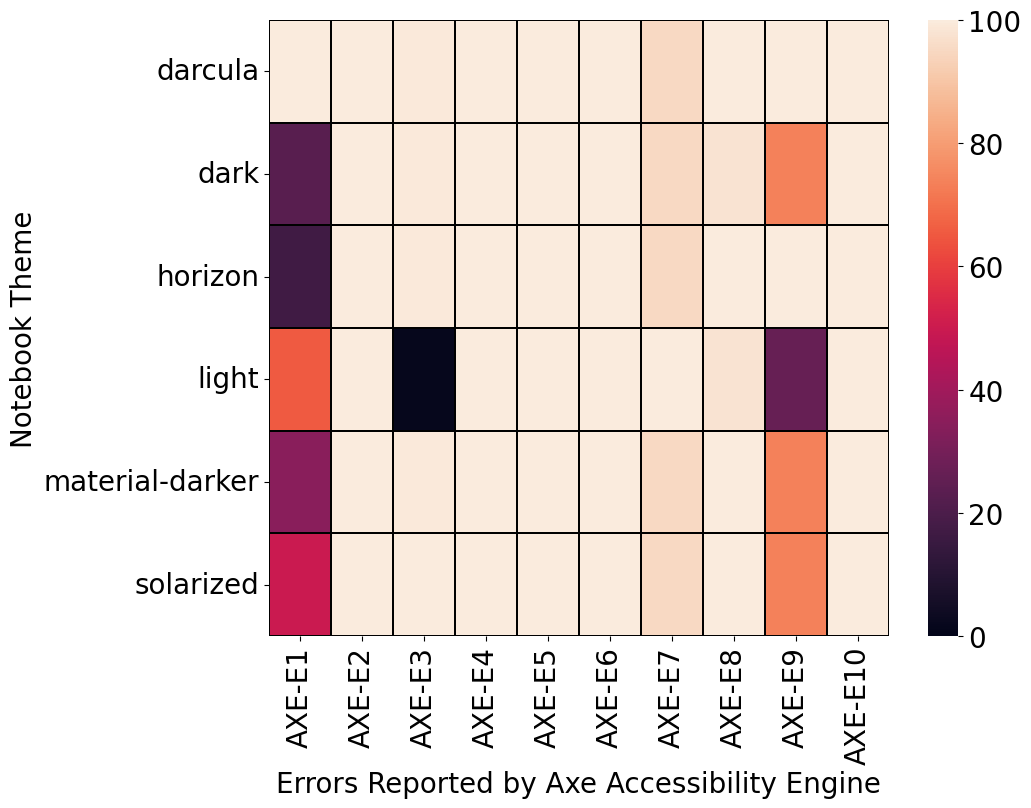

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
sns.heatmap(axe_errors, robust=True, linewidths=0.1, linecolor='black', ax=ax, vmin=0, vmax=100)
ax.set_ylabel('Notebook Theme', fontsize=20)
ax.set_xlabel('Errors Reported by Axe Accessibility Engine', fontsize=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig('plot_out/fig-7a-errors-axe-heatmap.pdf', bbox_inches='tight')

**Figure 7(a)** The heatmap of errors for aXe indicates the percentage of errors of different types. The type of errors are presented on the x axis and the themes along the y axis with each cell ranging between 0 and 100.0. The corresponding legend of the color bar is to the right side of the figure.

---------

## Figure 7(b): Heatmap of Errors Types from HTMLCS Engine

In [9]:
htmlcs_errors = error_grid['htmlcs']

htmlcs_error_columns = htmlcs_errors.columns

htmlcs_reassignment = {}

for i, column_name in enumerate(htmlcs_error_columns):
    htmlcs_reassignment[column_name] = f'HTMLCS-E{i+1}'

htmlcs_reassignment_df = pandas.DataFrame.from_dict(htmlcs_reassignment, orient="index")
htmlcs_reassignment_df.rename(columns={0: 'Error Code'}, inplace=True)
htmlcs_reassignment_df

,Error Code
WCAG2AA.Principle1.Guideline1_4.1_4_3.G18.Fail,HTMLCS-E1
WCAG2AA.Principle1.Guideline1_1.1_1_1.H37,HTMLCS-E2
WCAG2AA.Principle4.Guideline4_1.4_1_1.F77,HTMLCS-E3
"WCAG2AA.Principle1.Guideline1_3.1_3_1.H43,H63",HTMLCS-E4
WCAG2AA.Principle1.Guideline1_3.1_3_1.H43.HeadersRequired,HTMLCS-E5
WCAG2AA.Principle4.Guideline4_1.4_1_2.H91.A.EmptyNoId,HTMLCS-E6
WCAG2AA.Principle1.Guideline1_4.1_4_3.G145.Fail,HTMLCS-E7
WCAG2AA.Principle4.Guideline4_1.4_1_2.H91.A.NoContent,HTMLCS-E8
WCAG2AA.Principle4.Guideline4_1.4_1_2.H91.Button.Name,HTMLCS-E9


In [10]:
htmlcs_errors.rename(columns=htmlcs_reassignment, inplace=True)
htmlcs_errors

/tmp/ipykernel_367207/1344292131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  htmlcs_errors.rename(columns=htmlcs_reassignment, inplace=True)


DetailCode,HTMLCS-E1,HTMLCS-E2,HTMLCS-E3,HTMLCS-E4,HTMLCS-E5,HTMLCS-E6,HTMLCS-E7,HTMLCS-E8,HTMLCS-E9
Theme,,,,,,,,,
darcula,14874771,294988,127830,96183,22728,20515,6320,2482,961
dark,15489748,294988,127767,96183,22728,20603,5910,2481,937
horizon,2452722,294988,127867,96183,22728,20511,6035,2483,937
light,20697224,294959,127832,96167,22727,20542,460,2488,937
material-darker,4154616,294988,127873,96183,22728,20573,5992,2481,961
solarized,6501129,294988,127875,96183,22728,20605,6297,2483,961


In [11]:
columns = htmlcs_errors.columns.tolist()
for updated_column in columns:
    normalizer = htmlcs_errors[updated_column].max()
    htmlcs_errors[updated_column] = htmlcs_errors[updated_column] / normalizer * 100.0

htmlcs_errors

/tmp/ipykernel_367207/1014724899.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  htmlcs_errors[updated_column] = htmlcs_errors[updated_column] / normalizer * 100.0


DetailCode,HTMLCS-E1,HTMLCS-E2,HTMLCS-E3,HTMLCS-E4,HTMLCS-E5,HTMLCS-E6,HTMLCS-E7,HTMLCS-E8,HTMLCS-E9
Theme,,,,,,,,,
darcula,71.868435,100.000000,99.964809,100.000000,100.0000,99.563213,100.000000,99.758842,100.000000
dark,74.839737,100.000000,99.915543,100.000000,100.0000,99.990294,93.512658,99.718650,97.502601
horizon,11.850488,100.000000,99.993744,100.000000,100.0000,99.543800,95.490506,99.799035,97.502601
light,100.000000,99.990169,99.966373,99.983365,99.9956,99.694249,7.278481,100.000000,97.502601
material-darker,20.073301,100.000000,99.998436,100.000000,100.0000,99.844698,94.810127,99.718650,100.000000
solarized,31.410633,100.000000,100.000000,100.000000,100.0000,100.000000,99.636076,99.799035,100.000000


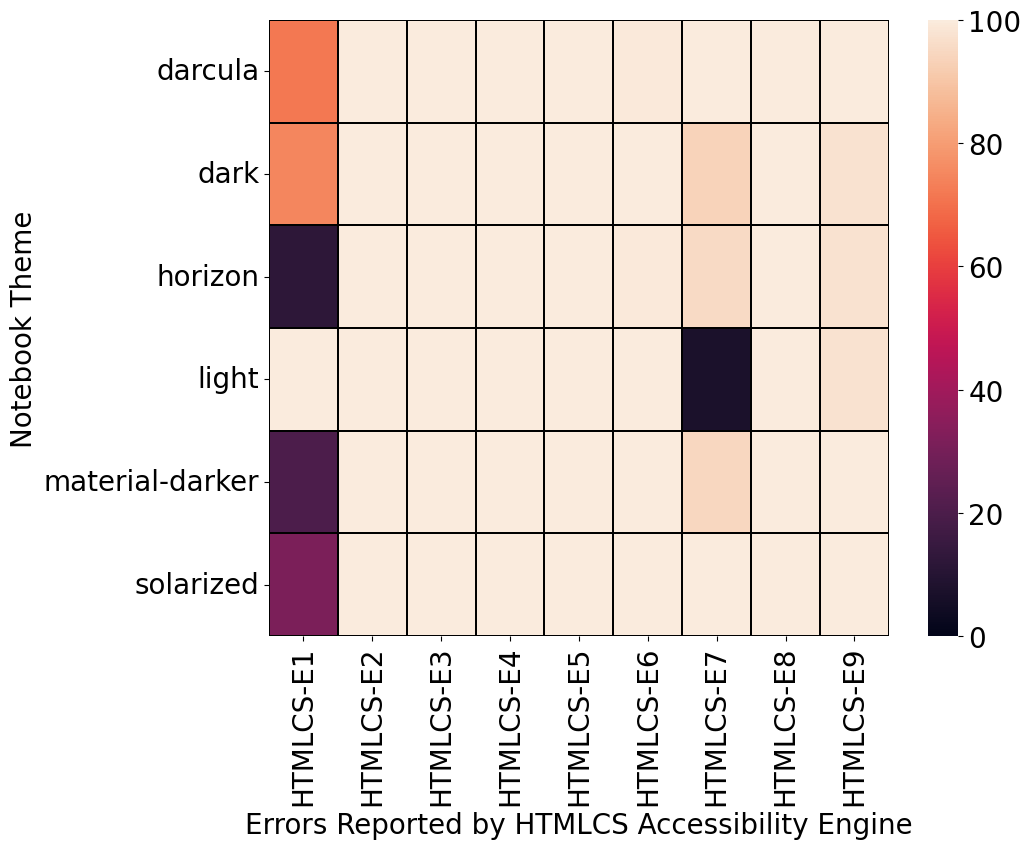

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
sns.heatmap(htmlcs_errors, robust=True, linewidths=0.1, linecolor='black', ax=ax, vmin=0, vmax=100)
ax.set_ylabel('Notebook Theme', fontsize=20)
ax.set_xlabel('Errors Reported by HTMLCS Accessibility Engine', fontsize=20)
plt.savefig('plot_out/fig-7b-errors-htmlcs-heatmap.pdf', bbox_inches='tight')

**Figure 7(b)** is similar to 7a, but contains 9 error types instead of 10 in 7a. The key for the error codes along the x axis for both figures are presented in the table below.

------------

| **AXE** | **HTMLCS** | **WCAG 2AA**                                      | **Error Description**                                                                  | **Impact** |
|---------|------------|---------------------------------------------------|----------------------------------------------------------------------------------------|------------|
| AXE-E1  | HTMLCS-E1  | 1.4.3 G18 Fail                                    | Text elements must have sufficient color contrast against the background               | Serious    |
| AXE-E2  | HTMLCS-E2  | 1.1.1 H37                                         | Images must have alternate text                                                        | Critical   |
| AXE-E3  | HTMLCS-E7  | 1.4.3 F24                                         | Links must be distinguished from surrounding text in a way that does not rely on color | Serious    |
| AXE-E4  |            | 2.4.4 H77, H78, H79, H80, H81, H33                | Links must have discernible text                                                       | Serious    |
| AXE-E5  |            | 2.4.1 G1, G123, G124, H69                         | Page must have means to bypass repeated blocks                                         | Serious    |
| AXE-E6  |            | 1.2.1 G159, G166                                  | `<audio>` elements must have a captions `<track>`                                      | Critical   |
| AXE-E7  |            |                                                   | `aria-hidden` elements do not contain focusable elements                               | Serious    |
| AXE-E8  |            |                                                   | ARIA input fields must have an accessible name                                         | Serious    |
| AXE-E9  |            |                                                   | Certain ARIA roles must be contained by particular parent elements                     | Critical   |
| AXE-E10 |            |                                                   | All page content must be contained by landmarks                                        | Moderate   |
|         | HTMLCS-E3  | 4.1.1 F77                                         | Duplicate ID attribute value found on the web page                                     | Minor      |
|         | HTMLCS-E4  | 1.3.1 H43, H63                                    | Tables not using header or scope attributes                                            | Critical   |
|         | HTMLCS-E5  | 1.3.1 H43 Headers Required                        | Table Header Required and currently not used                                           | Critical   |
|         | HTMLCS-E6  | 4.1.2 H91 EmptyNoId                               | Anchor elements with no ID or link content                                             | Serious    |
|         | HTMLCS-E8  | 4.1.2 H91 NoContent                               | Anchor elements with valid link but no link text content                               | Serious    |
|         | HTMLCS-E9  | 4.1.2 H91 Button Name<br>4.1.2 H91 [Element] Name | This [Element type] does not have a name available to an accessibility API.            | Critical   |